In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit

plt.rcParams['text.usetex'] = True

In [2]:
# Generates random upper triangular matrix
def generate_U(n):
    A = np.zeros((n,n))
    for i in range(n):
        t = np.random.random((n-i,))
        A += np.diag(t,i)
    return A

In [3]:
def solve_upper_triangular_system(U,b):
    x = np.zeros_like(b)
    n = U.shape[0]
    for i in range(n-1,-1,-1):
        x[i] = (b[i] - np.dot(U[i,i+1:],x[i+1:]))/(U[i,i])
    return x

In [4]:
n = 10
U = generate_U(n)
b = np.random.random(n)
x = solve_upper_triangular_system(U,b)
print("The error in solution of the linear system is ", np.linalg.norm(U@x-b))

The error in solution of the linear system is  4.242156220644677e-15


In [9]:
computation_time=[]
timer =  timeit.Timer()

for i in range(4):   
    n = 10**i
    compute_time_for_n = []
    for j in range(10**(5-i)):
        U = generate_U(n)
        b = np.random.random(n)
        start = timeit.default_timer()
        x = solve_upper_triangular_system(U,b)
        stop = timeit.default_timer() 
        #print("The time to compute the solution is", stop-start)
        compute_time_for_n.append(stop-start)
    print("The average time to compute the solution is", np.average(compute_time_for_n))
    print("The total time to compute the solution is", np.sum(compute_time_for_n))
    computation_time.append(np.average(compute_time_for_n))

 

The average time to compute the solution is 2.471063004923053e-06
The total time to compute the solution is 0.2471063004923053
The average time to compute the solution is 1.0542549943784252e-05
The total time to compute the solution is 0.10542549943784252
The average time to compute the solution is 9.53031003155047e-05
The total time to compute the solution is 0.09530310031550471
The average time to compute the solution is 0.0010612500002025627
The total time to compute the solution is 0.10612500002025627


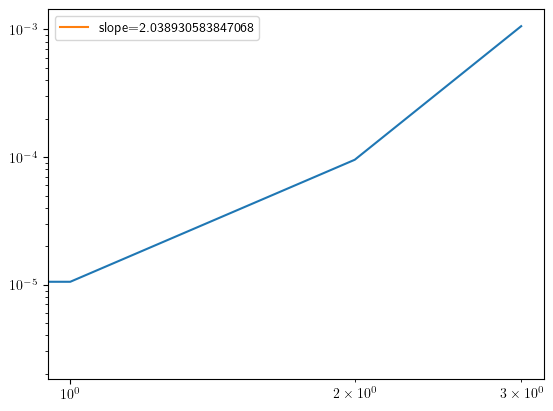

In [10]:
n = np.arange(0.,4.,1.)
plt.loglog(n,computation_time)
a,b = np.polyfit(n,np.log(computation_time),1)
plt.plot(n,a*n+b,label=f'slope={a}')
plt.legend()
plt.show()